In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
#a)
df =pd.read_csv('sample_data/Q1_Dataset.csv')

In [61]:
#solving the capitalization inconsistency
df["Neighborhood"] = df["Neighborhood"].str.title()

In [62]:
# Group by neighborhood and describe apartment size
size_distribution = df.groupby('Neighborhood')['Size_in_Sqft'].describe()

# Display the distribution
size_distribution

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
Downtown,57.0,733.192982,307.678603,301.0,542.00,702.0,891.00,1471.0
Midtown,65.0,777.553846,318.627380,312.0,504.00,748.0,1069.00,1412.0
Suburbs,62.0,825.419355,270.187825,329.0,603.25,810.0,981.25,1497.0
Uptown,68.0,848.014706,307.335953,307.0,613.50,898.5,1083.00,1489.0


In [63]:
#---------------------------------------------------------------------------------------------------#
#b)
# Clean 'Bedrooms' column (convert 'Studio' to 0 and ensure numeric type)
df['Bedrooms'] = df['Bedrooms'].astype(str).str.strip().replace({'Studio': '0', 'studio': '0'})
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'], errors='coerce')

#dropping invalid rows with invalid data
df_clean = df.dropna(subset=['Bedrooms', 'Bathrooms', 'Rental_Price'])

In [64]:
#grouping
bedroom_stats = df_clean.groupby('Bedrooms')['Rental_Price'].describe()
bathroom_stats = df_clean.groupby('Bathrooms')['Rental_Price'].describe()

In [65]:
# Display stats
print("Rental Price by Number of Bedrooms:\n", bedroom_stats)
print("\nRental Price by Number of Bathrooms:\n", bathroom_stats)

Rental Price by Number of Bedrooms:
           count         mean          std          min          25%  \
Bedrooms                                                              
0.0        71.0  1906.554683   598.459365   804.814268  1489.307808   
1.0        92.0  4355.421458  1433.838723  2039.851098  3092.763313   
2.0        48.0  4968.135943  1615.113795  1810.151121  4022.049891   
3.0        34.0  5950.691543  1533.161767  3465.185453  4777.598646   
4.0         5.0  8816.897761  2577.742234  6817.038486  7074.471600   

                  50%          75%           max  
Bedrooms                                          
0.0       1829.050455  2306.709945   3362.641790  
1.0       4111.282797  5204.382523   9669.964568  
2.0       4638.997465  5872.486708   9618.169228  
3.0       5863.297444  6837.953936   9981.611756  
4.0       8106.271997  8907.430141  13179.276580  

Rental Price by Number of Bathrooms:
            count         mean          std          min          25% 

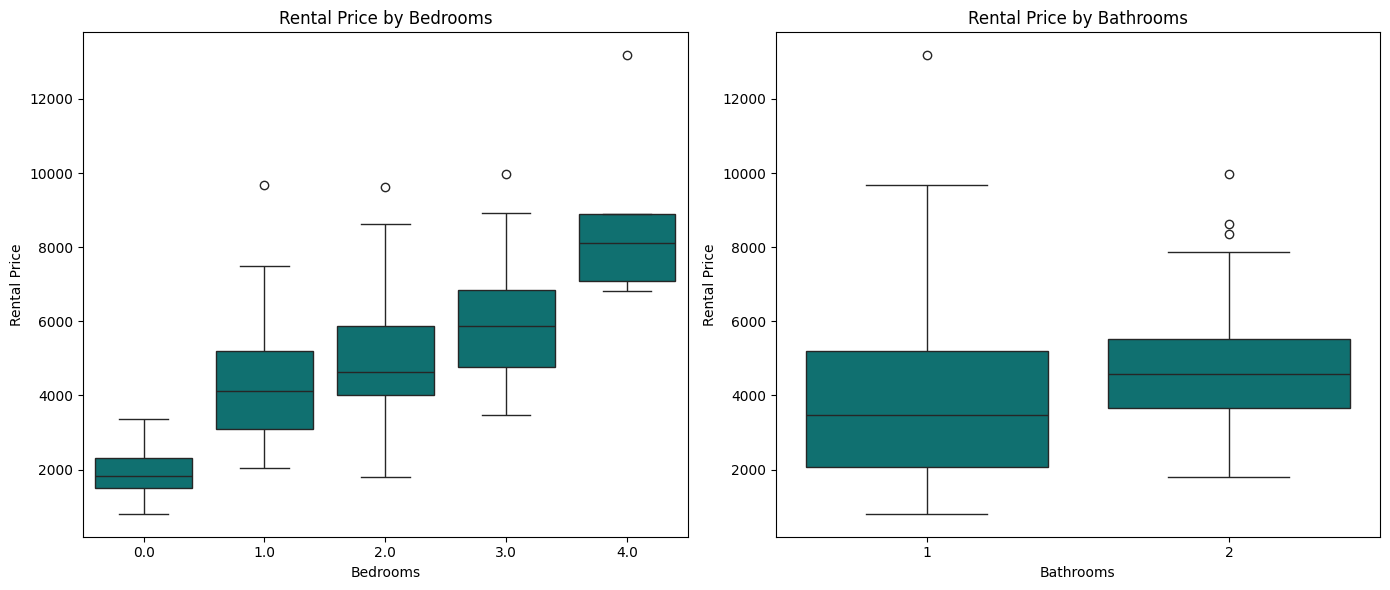

In [66]:
#plottig the boxplot
plt.figure(figsize=(14, 6))

# Rental Price vs Bedrooms
plt.subplot(1, 2, 1)
sns.boxplot(data=df_clean, x='Bedrooms', y='Rental_Price',color="teal")
plt.title('Rental Price by Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Rental Price')

# Rental Price vs Bathrooms
plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean, x='Bathrooms', y='Rental_Price',color="teal")
plt.title('Rental Price by Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Rental Price')

plt.tight_layout()
plt.show()

Furnished     Furnished  Unfurnished
Neighborhood                        
Downtown       0.596491     0.403509
Midtown        0.769231     0.230769
Suburbs        0.709677     0.290323
Uptown         0.602941     0.397059


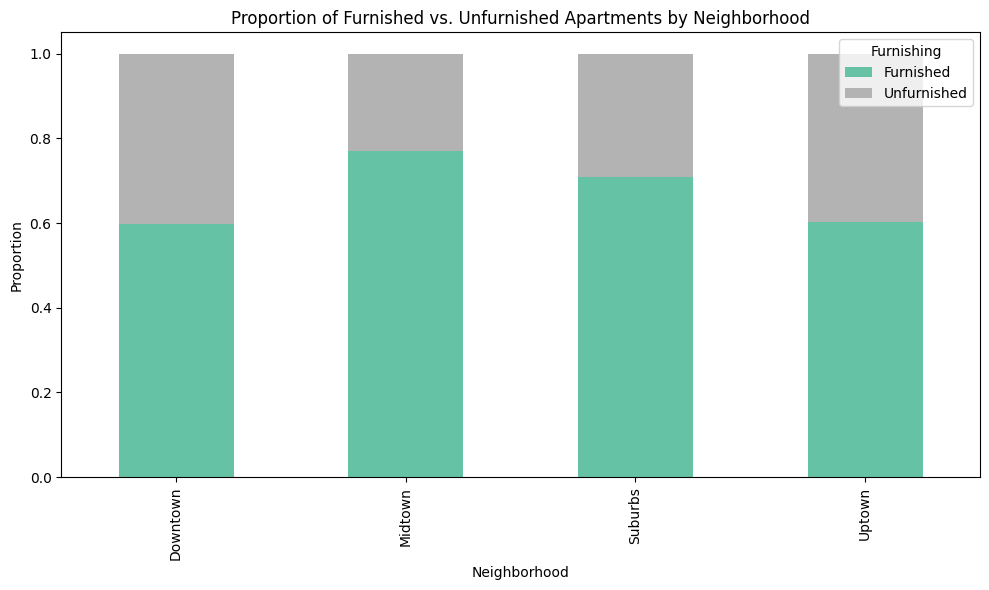

In [67]:
#---------------------------------------------------------------------------------------------------#
#c)

# Normalize values (capitalization inconsistency)
df['Neighborhood'] = df['Neighborhood'].str.strip().str.title()
df['Furnished'] = df['Furnished'].str.strip().str.title()

# Group by Neighborhood and Furnished status
furnish_counts = df.groupby(['Neighborhood', 'Furnished']).size().unstack(fill_value=0)

# Calculate proportions
furnish_proportions = furnish_counts.div(furnish_counts.sum(axis=1), axis=0)

# Display the proportion table
print(furnish_proportions)

# Plot as stacked bar chart
furnish_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Proportion of Furnished vs. Unfurnished Apartments by Neighborhood')
plt.ylabel('Proportion')
plt.xlabel('Neighborhood')
plt.legend(title='Furnishing')
plt.tight_layout()
plt.show()



In [72]:
#---------------------------------------------------------------------------------------------------#
#d)

# Drop rows with missing values in relevant columns
df_clean_2 = df.dropna(subset=['Size_in_Sqft', 'Bedrooms', 'Bathrooms'])

# Convert to integers for grouping and plotting
df_clean['Bedrooms'] = df_clean['Bedrooms'].astype(int)
df_clean['Bathrooms'] = df_clean['Bathrooms'].astype(int)


<ipython-input-72-b4cbd133e7ef>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Bedrooms'] = df_clean['Bedrooms'].astype(int)
<ipython-input-72-b4cbd133e7ef>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Bathrooms'] = df_clean['Bathrooms'].astype(int)


In [73]:
#correlation matrix
correlation_matrix = df_clean[['Size_in_Sqft', 'Bedrooms', 'Bathrooms']].corr()
correlation_matrix

,Size_in_Sqft,Bedrooms,Bathrooms
Size_in_Sqft,1.000000,0.517423,0.473163
Bedrooms,0.517423,1.000000,0.225244
Bathrooms,0.473163,0.225244,1.000000


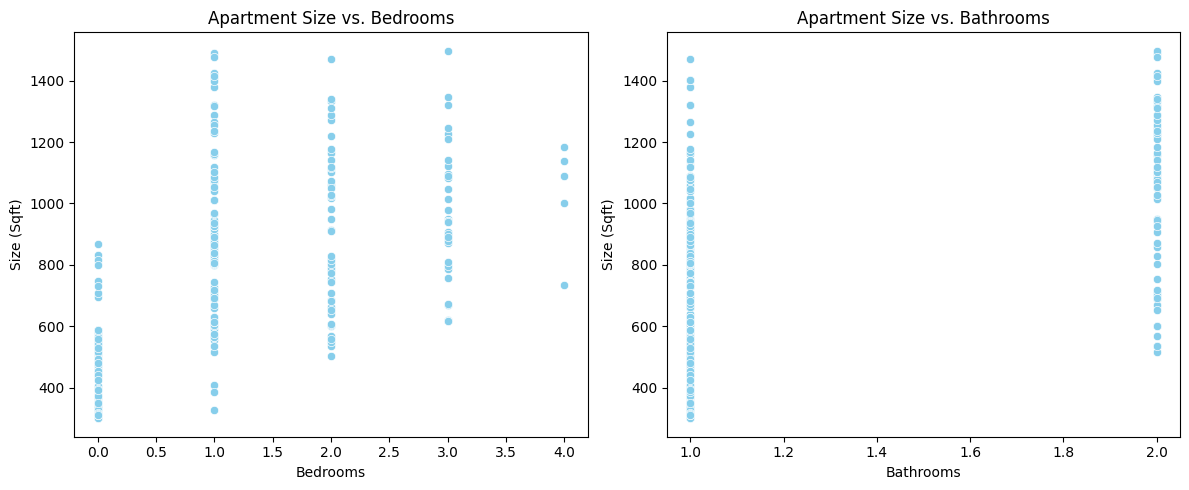

In [70]:
# Visualize relationships with scatter plot
plt.figure(figsize=(12, 5))

# Size vs Bedrooms
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_clean, x='Bedrooms', y='Size_in_Sqft',color='skyblue')
plt.title('Apartment Size vs. Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Size (Sqft)')

# Size vs Bathrooms
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_clean, x='Bathrooms', y='Size_in_Sqft',color='skyblue')
plt.title('Apartment Size vs. Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Size (Sqft)')

plt.tight_layout()
plt.show()